In [10]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install qiskit qiskit-aer --quiet
!pip install pylatexenc

In [13]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

In [14]:
backend = AerSimulator()
print("Qiskit & Aer Simulator ready.")

Qiskit & Aer Simulator ready.


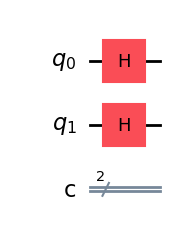

In [15]:
# ==============================================================
# Task 1: Apply Hadamard on BOTH QUBITS
# ==============================================================

qc = QuantumCircuit(2, 2)  # 2 qubits + 2 classical bits
qc.h(0)  # Hadamard on first qubit
qc.h(1)  # Hadamard on second qubit

qc.draw('mpl')

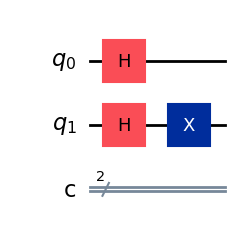

In [16]:
# ==============================================================
# Task 2: Swap Qubit Roles — Apply X on SECOND qubit
# ==============================================================

qc.x(1)  # Flip the second qubit (|0> → |1>)
qc.draw('mpl')

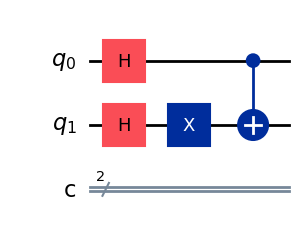

In [17]:
# ==============================================================
# Task 3: Add a CNOT Gate (Creates Entanglement)
# ==============================================================

qc.cx(0, 1)  # Control = qubit 0, Target = qubit 1
qc.draw('mpl')

In [18]:
# ==============================================================
# Task 4: Increase Measurement Shots to 4096
# ==============================================================

# Add measurement operations
qc.measure(0, 0)
qc.measure(1, 1)

# Run the simulation with 4096 shots
job = backend.run(qc, shots=4096)
result = job.result()
counts = result.get_counts()

print("\nMeasurement Results (4096 shots):\n", counts)
plot_histogram(counts)
plt.show()


Measurement Results (4096 shots):
 {'11': 1012, '01': 999, '00': 1065, '10': 1020}


In [20]:
# ==============================================================
# Task 5 (Part 1): Visualize Combined State BEFORE Measurement
# ==============================================================

# Create a copy of the current circuit (without measurement)
qc_no_measure = qc.copy()

# Ensure we do NOT include measurement ops
qc_no_measure.data = [inst for inst in qc_no_measure.data if inst.operation.name != 'measure']

# Generate Statevector from the "unmeasured" circuit
state_before = Statevector.from_instruction(qc_no_measure)

print("Statevector before measurement:\n")
print(state_before)

# Plot Bloch sphere visualization
plot_bloch_multivector(state_before)
plt.show()

Statevector before measurement:

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))



Final Quantum Circuit:



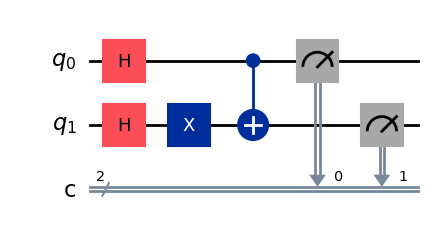

In [21]:
# ==============================================================
# Task 5 (Part 2): Observation & Final Circuit Visualization
# ==============================================================

print("\nFinal Quantum Circuit:\n")
qc.draw('mpl')